In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import HELP
get_model = HELP.get_model
make_spotmodel = HELP.make_spotmodel
Dotter_rad = HELP.Dotter_rad
MagConvert = HELP.MagConvert
V_VKPlotData = HELP.V_VKPlotData
PleiadesDeltaV_VK = HELP.PleiadesDeltaV_VK
CMDData = HELP.CMDData
DeltaVfunc = HELP.DeltaVfunc

import getMag
getMag = getMag.getMag

import getMag_hires
getMag_hires = getMag_hires.getMag_hires

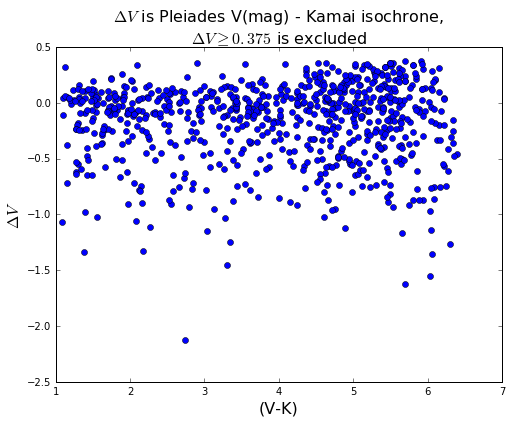

In [2]:
PleiaVK,DeltV = PleiadesDeltaV_VK('V-K','V')

plt.figure(figsize=(8,6))
plt.plot(PleiaVK,DeltV,'o')
plt.title('$\Delta V$ is Pleiades V(mag) - Kamai isochrone,\n$\Delta V\geq 0.375$ is excluded',fontsize=16)
plt.xlabel('(V-K)',fontsize=16)
plt.ylabel('$\Delta V$',fontsize=16)
plt.savefig('DeltaV_VK.jpg')

In [3]:
PhMax = 7000
PhMin = 3600
SpTempFrac = [1.,0.]
FillFactor = 0.5 #np.arange(0,0.501,0.05)

Vmags = []
VKmags = []
for i in range(len(SpTempFrac)-1):
    x = V_VKPlotData(PhMax,PhMin,SpTempFrac[i],FillFactor)
    Vmags.append(x[0])
    VKmags.append(x[1])
#Vmags and VKmags filled with sets of magnitudes over photospheric temperature range. Sets follow range of
#filling factor at a constant 80% spot temperature relative to the photospheric temp.



In [4]:
print(Vmags)
a = [i/2 for i in Vmags[0]]
b = [i/2 for i in VKmags[0]]
Vmags.append(a)
VKmags.append(b)

[[3.188503202721483, 3.4220613248180136, 3.6993695444833912, 4.0024025805168328, 4.3334646529704939, 4.6665729092474493, 4.9918828351727047, 5.3101340074596317, 5.6351882570517473, 5.9770465649596218, 6.3278581716625295, 6.6988167408740935, 7.0969868141201919, 7.5286111333986536, 8.0254275855988659, 8.606619553246226, 9.2610661580225084]]


In [5]:
print(Vmags)
print(VKmags)

[[3.188503202721483, 3.4220613248180136, 3.6993695444833912, 4.0024025805168328, 4.3334646529704939, 4.6665729092474493, 4.9918828351727047, 5.3101340074596317, 5.6351882570517473, 5.9770465649596218, 6.3278581716625295, 6.6988167408740935, 7.0969868141201919, 7.5286111333986536, 8.0254275855988659, 8.606619553246226, 9.2610661580225084], [1.5942516013607415, 1.7110306624090068, 1.8496847722416956, 2.0012012902584164, 2.1667323264852469, 2.3332864546237246, 2.4959414175863524, 2.6550670037298159, 2.8175941285258737, 2.9885232824798109, 3.1639290858312648, 3.3494083704370468, 3.548493407060096, 3.7643055666993268, 4.012713792799433, 4.303309776623113, 4.6305330790112542]]
[[0.86216255812062537, 0.96022919375545257, 1.0637266913037577, 1.1710750048709024, 1.284910422888494, 1.4056755299464423, 1.5343686928314582, 1.672956322820661, 1.8268181105266961, 1.9975018642167588, 2.1785227612407265, 2.3979789596801098, 2.6421246408203594, 2.9165212106122222, 3.1960616149037131, 3.4730294204076273

In [6]:
KamaiIsochrone = open('data/Kamai_Isochrone.tbl','r')
names = KamaiIsochrone.readline().split
KamaiIsochrone.close()
KamaiIsochrone = pd.read_table('data/Kamai_Isochrone.tbl',sep=None,engine='python')

KamaiV = [i-5.67 for i in KamaiIsochrone['V']]
KamaiVK = KamaiIsochrone['V - K']

/Users/saethen/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


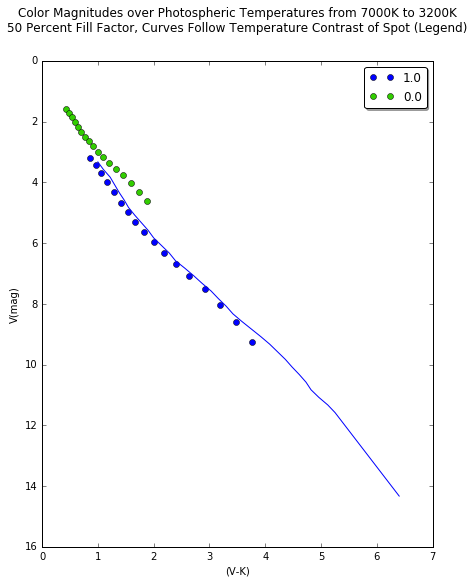

In [7]:
plt.figure(figsize=(7,10))
colormap = plt.cm.brg
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0,0.9,len(SpTempFrac))])


for i in range(len(SpTempFrac)):
    plt.plot(VKmags[i],Vmags[i],'o')
plt.plot(KamaiVK,KamaiV)

plt.tight_layout
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.8)

plt.legend(SpTempFrac,fancybox=True,shadow=True)
plt.xlabel('(V-K)')
plt.ylabel('V(mag)')
plt.title('Color Magnitudes over Photospheric Temperatures from 7000K to 3200K\n50 Percent Fill Factor, Curves Follow Temperature Contrast of Spot (Legend)',y=1.05)
plt.savefig('CodeTest.jpg')

In [8]:
Vmags = np.asarray(Vmags)
VKmags = np.asarray(VKmags)
VK = []
DeltaV = []
for i in range(len(Vmags)):
    x = DeltaVfunc(VKmags[i],Vmags[i])
    VK.append(x[0])
    DeltaV.append(x[1])

/Users/saethen/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


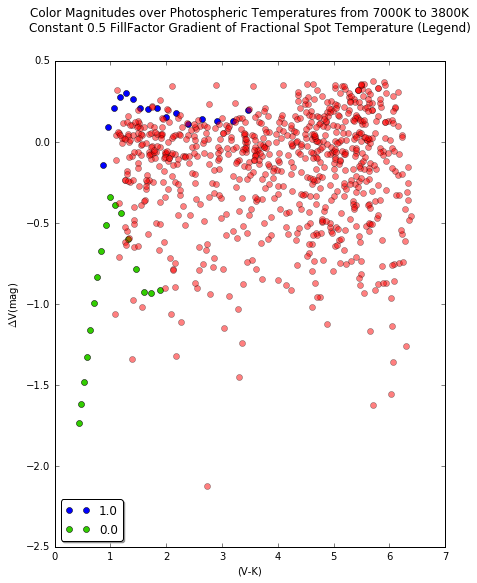

In [9]:
plt.figure(figsize=(7,10))
colormap = plt.cm.brg
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0,0.9,len(VK))])


for i in range(len(VK)):
    plt.plot(VK[i],DeltaV[i],'o')
plt.plot(PleiaVK,DeltV,'ro',alpha=0.5)

plt.tight_layout
plt.subplots_adjust(top=0.8)

plt.legend(SpTempFrac,fancybox=True,shadow=True,loc='best')
plt.xlabel('(V-K)')
plt.ylabel('$\Delta$V(mag)')
plt.title('Color Magnitudes over Photospheric Temperatures from 7000K to 3800K\nConstant 0.5 FillFactor Gradient of Fractional Spot Temperature (Legend)',y=1.05)
plt.savefig('DeltaVFillFactor.jpg')

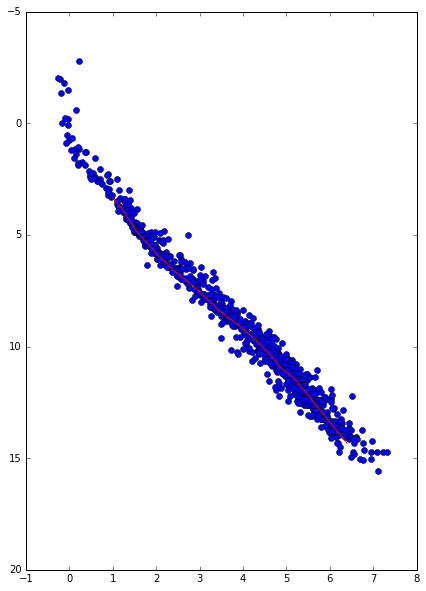

In [10]:
#Testing a new general function to grab Pleiades magnitudes

PleiaK,PleiaV = CMDData('K','V')
PleiaVK = [i-j for i,j in zip(PleiaV,PleiaK)]

plt.figure(figsize=(7,10))
plt.plot(PleiaVK,PleiaV,'o',KamaiVK,KamaiV,'r-')
plt.gca().invert_yaxis()

In [11]:
#EXAMPLE FROM ONLINE, HOW DOES THIS WORKKKKKKKKKKKKKK??????????

a = [('650', '724', '6354', '', '', ''), ('', '', '', '650', '723', '4539')]
[tuple(y for y in x if y) for x in a]

[('650', '724', '6354'), ('650', '723', '4539')]